In [1]:
import os
import requests

#Get pdf document
pdf_path= "/content/human-nutirition-text-pdf"

#Download
if not os.path.exists(pdf_path):
  print(f"[INFO] File doesnt exist, downloading")

  #enter the url of pdf
  url= "https://pressbooks.oer.hawaii.edu/humannutrition2/open/download?type=pdf"

  filename=pdf_path

  #send a GET request to the URL
  response= requests.get(url)

  #Check if the request was successful

  if response.status_code==200:
    #Open the file and save it
    with open(filename,"wb") as file:
      file.write(response.content)
    print(f"INFO the file has been downloaded and saved as {filename}")
  else:
    print(f'Failed to download the file Status code {response.status_code}')
else:
  print(f"[INFO] File already exists, skipping download")



[INFO] File doesnt exist, downloading
INFO the file has been downloaded and saved as /content/human-nutirition-text-pdf


In [2]:
!pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 108.2 MB/s eta 0:00:00


In [3]:

import fitz
from tqdm.auto import tqdm

def text_formatter(text: str) -> str:
  """ Performs minor formatting on text """

  cleaned_text= text.replace("\n"," ").strip()
  #more cleaning can be done here...

  return cleaned_text

def open_and_read_pdf(pdf_path: str) -> list[dict]:

  doc= fitz.open(pdf_path)
  print(doc)
  pages_and_text= []
  for page_number,page in tqdm(enumerate(doc)):
    text=page.get_text()
    text= text_formatter(text=text)
    pages_and_text.append({"page_number": page_number - 41,
                           "page_char_count": len(text),
                           "page_word_count": len(text.split(" ")),
                           "page_sentence_count_raw": len(text.split(".")),
                           "page_token_count": len(text)/4, # 1 token- 4 characters
                           "text": text})
  return pages_and_text

pages_and_text= open_and_read_pdf(pdf_path=pdf_path)
pages_and_text[:2]

Document('/content/human-nutirition-text-pdf')


0it [00:00, ?it/s]

[{'page_number': -41,
  'page_char_count': 29,
  'page_word_count': 4,
  'page_sentence_count_raw': 1,
  'page_token_count': 7.25,
  'text': 'Human Nutrition: 2020 Edition'},
 {'page_number': -40,
  'page_char_count': 0,
  'page_word_count': 1,
  'page_sentence_count_raw': 1,
  'page_token_count': 0.0,
  'text': ''}]

In [4]:
# text= "hey \n how are you? It's been a long time since we've met \n How'z everyone doing at home?"
# print(type(text_formatter(text)))

In [5]:
import random

random.sample(pages_and_text,k=3)

[{'page_number': 1127,
  'page_char_count': 1533,
  'page_word_count': 218,
  'page_sentence_count_raw': 38,
  'page_token_count': 383.25,
  'text': 'an incessant fear of weight gain but instead have an obsession with  “feeling pure, healthy and natural.”7 People affected by orthorexia  nervosa tend to follow diets tied to a philosophy or theory and  believe that their theory of eating is the best.8 9 Such diets often  have a redemptive quality that involves denying oneself of “bad” or  “wrong” foods.10 In extreme cases, affected individuals may also fear  contamination or harm from water and electricity leading them to  use filters to purify their environment from electrical emissions.  7.\xa0Mathieu J. (2005). What is orthorexia? Journal of the  American Dietetic Association,\xa0105(10), 1510-1512.  Bratman, S. Health Food Junkie. Yoga Journal. 1997,\xa0 September/October, 42-50. Available at  https://www.orthorexia.com/original-orthorexia- essay/.  8.\xa0Donini LM, Marsili D, Grazia

In [6]:
import pandas as pd

df= pd.DataFrame(pages_and_text)
df.head()

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,text
0,-41,29,4,1,7.25,Human Nutrition: 2020 Edition
1,-40,0,1,1,0.00,
2,-39,320,54,1,80.00,Human Nutrition: 2020 Edition UNIVERSITY OF ...
3,-38,212,32,3,53.00,Human Nutrition: 2020 Edition by University of...
4,-37,797,145,3,199.25,Contents Preface University of Hawai‘i at Mā...


In [7]:
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count
count,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.00,198.30,14.18,287.00
std,348.86,560.38,95.76,9.54,140.10
min,-41.00,0.00,1.00,1.00,0.00
25%,260.75,762.00,134.00,8.00,190.50
50%,562.50,1231.50,214.50,13.00,307.88
75%,864.25,1603.50,271.00,19.00,400.88
max,1166.00,2308.00,429.00,82.00,577.00


Why would we care about token counts?

Token count is important because:
1. Embedding models dont deal with infinite tokens
2. LLMs dont deal with infinite tokens


For example an embedding model may have been trained to embed sequences of 384 tokens into numerical space.(sentence transformer,all-mpnet-base-v2)

As for LLMs, they can't accept infinite tokens in their context window.

### Further text processing (splitting pages into sentences)

Two ways:
1. We have done this by splitting on '.'
2. We can do this with a NLP library such as spaCy https://spacy.io/ and nltk(https://www.nltk.org/).



In [8]:
from spacy.lang.en import English

nlp= English()

#Add a sentencizer pipeline, see https://spacy.io/api/sentencizer
nlp.add_pipe("sentencizer")

#Create document instance as an example
doc=nlp("This is a sentence. This another sentence. I like elephants")
assert len(list(doc.sents))==3

print(list(doc.sents))


[This is a sentence., This another sentence., I like elephants]


In [9]:
pages_and_text[2]

{'page_number': -39,
 'page_char_count': 320,
 'page_word_count': 54,
 'page_sentence_count_raw': 1,
 'page_token_count': 80.0,
 'text': 'Human Nutrition: 2020  Edition  UNIVERSITY OF HAWAI‘I AT MĀNOA  FOOD SCIENCE AND HUMAN  NUTRITION PROGRAM  ALAN TITCHENAL, SKYLAR HARA,  NOEMI ARCEO CAACBAY, WILLIAM  MEINKE-LAU, YA-YUN YANG, MARIE  KAINOA FIALKOWSKI REVILLA,  JENNIFER DRAPER, GEMADY  LANGFELDER, CHERYL GIBBY, CHYNA  NICOLE CHUN, AND ALLISON  CALABRESE'}

In [10]:
for item in tqdm(pages_and_text):
  item["sentences"]=list(nlp(item["text"]).sents)

  #Make sure all sentences are string (default type is spacy datatype)
  item["sentences"]=[str(sentences) for sentences in item["sentences"]]

  #Count the sentences
  item["page_sentence_count_spacy"]=len(item["sentences"])

  0%|          | 0/1208 [00:00<?, ?it/s]

In [11]:
random.sample(pages_and_text,k=1)

[{'page_number': 470,
  'page_char_count': 832,
  'page_word_count': 139,
  'page_sentence_count_raw': 9,
  'page_token_count': 208.0,
  'text': 'Learning Activities  Technology Note: The second edition of the Human  Nutrition Open Educational Resource (OER) textbook  features interactive learning activities.\xa0 These activities are  available in the web-based textbook and not available in the  downloadable versions (EPUB, Digital PDF, Print_PDF, or  Open Document).  Learning activities may be used across various mobile  devices, however, for the best user experience it is strongly  recommended that users complete these activities using a  desktop or laptop computer and in Google Chrome.  \xa0 An interactive or media element has been  excluded from this version of the text. You can  view it online here:  http://pressbooks.oer.hawaii.edu/ humannutrition2/?p=301  \xa0 An interactive or media element has been  excluded from this version of the text. You can  470  |  The Atom',
  'sentenc

In [12]:
df= pd.DataFrame(pages_and_text)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.00,198.30,14.18,287.00,10.32
std,348.86,560.38,95.76,9.54,140.10,6.30
min,-41.00,0.00,1.00,1.00,0.00,0.00
25%,260.75,762.00,134.00,8.00,190.50,5.00
50%,562.50,1231.50,214.50,13.00,307.88,10.00
75%,864.25,1603.50,271.00,19.00,400.88,15.00
max,1166.00,2308.00,429.00,82.00,577.00,28.00


### Chunking our sentences together

The concept of splitting larger pieces of text into smaller ones is often referred to as text splitting or chunking.

There is no 100% correct way to do this

We'll keep it simple and splits into groups of 10 sentences.
There are frameworks such as LangChain which can help with this https://python.langchain.com/docs/concepts/text_splitters/

WHY WE DO THIS:
1. So our texts are easier to filter(smaller groups are easier to inspect)
2. So our text chunks can fit into our embedding model context window(e.g. 384 tokens as a limit)
3. So our contexts passed to an LLM can be more specific and focused.

In [13]:
#Define split size to turn grpups of sentences into chunks

num_sentence_chunk_size=10


#Create a function to split lists of texts recursively into chunk size
# e.g.- [20] -> [10,10] or [25] -> [10,10,5]

def split_list(input_list: list[str],
               split_size: int=num_sentence_chunk_size)-> list[list[str]]:
               return [input_list[i:i+split_size] for i in range(0,len(input_list),split_size)]

text_list=list(range(25))
split_list(text_list)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [14]:
#Look through pages and text and split sentences into chunks
for item in tqdm(pages_and_text):
  item["sentence_chunks"]=split_list(input_list=item["sentences"],
                                     split_size=num_sentence_chunk_size)
  item["num_chunks"]=len(item["sentence_chunks"])

  0%|          | 0/1208 [00:00<?, ?it/s]

In [15]:
random.sample(pages_and_text,k=1)

[{'page_number': 303,
  'page_char_count': 804,
  'page_word_count': 148,
  'page_sentence_count_raw': 7,
  'page_token_count': 201.0,
  'text': 'Tools for Change  There are many  sources of omega-3 foods.  It is important to strike a proper balance between  omega-3 and omega-6 fats in your diet. Research suggests  that a diet that is too high in omega-6 fats distorts the  balance of proinflammatory agents, promoting chronic  inflammation and causing the potential for health problems  such as asthma, arthritis, allergies, or diabetes. Omega-6  fats compete with omega-3 fats for enzymes and will  actually replace omega-3 fats. The typical western diet is  characterized by an excessive consumption of foods high in  omega-6 fatty acids. To gain proper balance between the  two, increase your omega-3 fat intake by eating more fatty  fish or other sources of omega-3 fatty acids at least two  times per week.  The Role of Lipids in Food  |  303',
  'sentences': ['Tools for Change  There are ma

### Splitting each chunk into its own item

each chunk of sentence -> its own numerical representation -> good level of granularity.



In [16]:
import re

#split each chunk into its own item
pages_and_chunks=[]
for item in tqdm(pages_and_text):
  for sentence_chunk in item["sentence_chunks"]:
    chunk_dict={}
    chunk_dict["page_number"]=item["page_number"]

    #Join the sentences together into a paragraph- like structure, aka join the list of sentences into one paragraph
    joined_sentence_chunk="".join(sentence_chunk).replace("  "," ").strip()
    joined_sentence_chunk= re.sub(r'\.([A-Z])',r'. \1', joined_sentence_chunk)
    # print(joined_sentence_chunk)

    # joined_sentence_chunk=
    chunk_dict["sentence_chunk"]=joined_sentence_chunk

    # Get some stats on our chunks
    chunk_dict["chunk_char_chount"]=len(joined_sentence_chunk)
    chunk_dict["chunk_word_count"]=len([word for word in joined_sentence_chunk.split(" ")])
    chunk_dict["chunk_token_count"]= len(joined_sentence_chunk)/4  # 1 token = 4 characters
    pages_and_chunks.append(chunk_dict)


  0%|          | 0/1208 [00:00<?, ?it/s]

In [17]:
# hey="hey how are you?"
# len(hey)

In [18]:
len(pages_and_chunks)

1843

In [19]:
random.sample(pages_and_chunks,k=1)

[{'page_number': 473,
  'sentence_chunk': 'The CDC reports that in 2009 in the United States, 33 percent of adults and 16 percent of children were obese, a doubling and tripling of the numbers since 1980, respectively, while in Hawai‘i the obesity rate was 23.8% in 2016 with 40.8% of those individuals being Native Hawaiians.2 The health consequences of too much body fat are numerous, including increased risks for cardiovascular disease, Type 2 diabetes, and some cancers. The medical costs related to obesity are well over one hundred billion dollars and in Hawai‘i, over $470 million is spent annually.\xa0 On the individual level, people who are obese spend $1,429 more per year for medical care than people of healthy weight. Numerous obesogenic agents that contribute to this immense public health problem have become a part of everyday life in American society. The fast food industry has been growing for decades and continues to grow despite the latest economic slump. In America today the

In [20]:
df=pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_chount,chunk_word_count,chunk_token_count
count,1843.00,1843.00,1843.00,1843.00
mean,583.38,734.44,112.33,183.61
std,347.79,447.54,71.22,111.89
min,-41.00,12.00,3.00,3.00
25%,280.50,315.00,44.00,78.75
50%,586.00,746.00,114.00,186.50
75%,890.00,1118.50,173.00,279.62
max,1166.00,1831.00,297.00,457.75


In [21]:
457-384

73

Filter chunks of text for short chunks

These chunks may not contain much useful information

In [22]:
#Show random chunks with under 30 tokens in length
min_token_length=30
for row in df[df["chunk_token_count"]<=min_token_length].sample(5).iterrows():
  print(f'chunk token count: {row[1]["chunk_token_count"]} | text : {row[1]["sentence_chunk"]}')

chunk token count: 3.25 | text : 828 | Infancy
chunk token count: 17.75 | text : Table 6.1 Essential and Nonessential Amino Acids Defining Protein | 365
chunk token count: 29.0 | text : 2010). EH. Net Encyclopedia. http://eh.net/?s=History+of+Food+and+Drug+Regulatio Protecting the Public Health | 1011
chunk token count: 11.75 | text : Accessed April 15, 2018. 1046 | Comparing Diets
chunk token count: 24.75 | text : http://www.ajcn.org/content/87/1/64.long. Accessed September 22, 2017. 554 | Water-Soluble Vitamins


In [23]:
#Filter our Dataframe for rows with under 30 tokens
pages_and_chunks_over_min_token_len=df[df["chunk_token_count"]> min_token_length].to_dict(orient="records")
pages_and_chunks_over_min_token_len[:2]

[{'page_number': -39,
  'sentence_chunk': 'Human Nutrition: 2020 Edition UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN NUTRITION PROGRAM ALAN TITCHENAL, SKYLAR HARA, NOEMI ARCEO CAACBAY, WILLIAM MEINKE-LAU, YA-YUN YANG, MARIE KAINOA FIALKOWSKI REVILLA, JENNIFER DRAPER, GEMADY LANGFELDER, CHERYL GIBBY, CHYNA NICOLE CHUN, AND ALLISON CALABRESE',
  'chunk_char_chount': 308,
  'chunk_word_count': 42,
  'chunk_token_count': 77.0},
 {'page_number': -38,
  'sentence_chunk': 'Human Nutrition: 2020 Edition by University of Hawai‘i at Mānoa Food Science and Human Nutrition Program is licensed under a Creative Commons Attribution 4.0 International License, except where otherwise noted.',
  'chunk_char_chount': 210,
  'chunk_word_count': 30,
  'chunk_token_count': 52.5}]

In [24]:
random.sample(pages_and_chunks_over_min_token_len,k=1)

[{'page_number': 812,
  'sentence_chunk': 'duration rates across the United States. La Leche League is an international program that provides mother-to-mother support, encouragement, and education about breastfeeding for women around the world. For more information on La Leche League, visit http://www.llli.org. The state coalition, Breastfeeding Hawai‘i, provides a list of local and national resources: https://bfhawaii.org/ index.php/lactation-support/. Although breastfeeding should be recommended and encouraged for almost all new mothers, it is important to remember that the decision to breastfeed is a personal choice and women should not be made to feel guilty if they cannot, or choose not, to breastfeed their infants. In some rare cases, a woman is unable to breastfeed or it is not in the baby’s best interest, for example if the baby has galactosemia, an inborn error of metabolism. Nutritional choices that parents make, such as the decision to breastfeed or bottle-feed, not only aff

### Embedding out Text Chunks
 Embeddings are a powerful concept.
 Machine understands numbers
 text chunks -> numbers ,

 A useful numerical representation.
 Best part -> embeddings are *learned* representations.

 ...
 {"the":0,
 "a":1,
 ...}

 https://vickiboykis.com/what_are_embeddings/

In [25]:
from sentence_transformers import SentenceTransformer
embedding_model= SentenceTransformer(model_name_or_path="all-mpnet-base-v2",device="cpu")


sentences=[" Hey everyone My name is muskan and I am pursuing Master's in AI","My research work is centered around Video Summarization","Currently I am exploring personalised Video Summarization"]

embeddings= embedding_model.encode(sentences)
embeddings_dict=dict(zip(sentences,embeddings))
print(embeddings.shape)
for sentence,embedding in embeddings_dict.items():
  print(f" Sentence: {sentence}")
  print(f" Embedding: {embedding}")
  print("")



/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

(3, 768)
 Sentence:  Hey everyone My name is muskan and I am pursuing Master's in AI
 Embedding: [ 2.84770783e-02  1.94112137e-02 -5.11290431e-02  1.94660909e-02
  5.96002936e-02 -2.16224361e-02  3.29924673e-02 -1.37970755e-02
  8.21515266e-03 -2.73991539e-03  3.76399383e-02  9.66601633e-03
 -1.05519942e-03  7.05568641e-02  3.61313485e-02 -4.43465710e-02
  5.75506464e-02 -2.79346295e-02  3.45404516e-03 -4.58190180e-02
 -2.14776620e-02  1.00932093e-02 -6.30272552e-02  3.08812177e-03
 -2.84736720e-03 -5.14094643e-02 -1.99105416e-04 -6.66215434e-04
  2.64175814e-02  3.78837772e-02  8.81159119e-03 -7.61162043e-02
 -1.45298121e-02  4.82573509e-02  1.89462469e-06 -3.56392153e-02
  1.29763624e-02  2.46622805e-02 -3.08278259e-02 -3.41099910e-02
  3.61462384e-02  4.53045256e-02  1.51467770e-02  4.25282344e-02
 -1.59142986e-02  7.14700222e-02  3.26582044e-02  2.34695394e-02
  1.19987214e-02  4.58968990e-02  7.20946165e-03 -1.87088493e-02
  7.21726865e-02 -1.54117392e-02 -1.62307348e-03 -5.681769

In [26]:
embeddings[0].shape

(768,)

In [27]:
embedding= embedding_model.encode("My favourite animal is the cow!")
embedding

array([-1.45473080e-02,  7.66727030e-02, -2.85872333e-02, -3.31283323e-02,
        3.65210772e-02,  4.78570387e-02, -7.08107278e-02,  1.62833966e-02,
        1.93444025e-02, -2.80481875e-02, -2.91746892e-02,  5.11309765e-02,
       -3.28720659e-02, -8.98753200e-03, -1.03672538e-02, -3.15488167e-02,
        4.22784276e-02, -9.13280062e-03, -1.94016788e-02,  4.35689203e-02,
       -2.31997799e-02,  4.29883450e-02, -1.72393303e-02, -2.01372430e-02,
       -3.13574187e-02,  8.08169041e-03, -2.06725001e-02, -2.27869172e-02,
        2.44812649e-02,  1.71968360e-02, -6.26673177e-02, -7.54796788e-02,
        3.57421897e-02, -5.46572218e-03,  1.24730332e-06, -7.63203809e-03,
       -3.53222564e-02,  1.91327073e-02,  3.99044976e-02,  2.11736304e-03,
        1.64565779e-02,  9.84051824e-03, -1.80700365e-02,  9.33830347e-03,
        3.23483013e-02,  5.84785640e-02,  4.23187129e-02,  1.62091721e-02,
       -9.14911777e-02,  1.82305146e-02, -5.25731966e-03, -7.81017030e-03,
       -3.47644053e-02, -

In [28]:
%%time

# embedding_model.to("cpu")

# #embed each chunk one by one
# for item in tqdm(pages_and_chunks_over_min_token_len):
#   item["embedding"]=embedding_model.encode(item["sentence_chunk"])



CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


In [29]:
%%time

embedding_model.to("cuda")

for item in tqdm(pages_and_chunks_over_min_token_len):
  # print(item["sentence_chunk"])
  item["embedding"]=embedding_model.encode(item["sentence_chunk"])
  # print(item["embedding"].shape)


  0%|          | 0/1680 [00:00<?, ?it/s]

CPU times: user 1min 7s, sys: 417 ms, total: 1min 8s
Wall time: 23.7 s


In [30]:
for item in pages_and_chunks_over_min_token_len:
  print(type(item["sentence_chunk"]))
  break

<class 'str'>


In [31]:
%%time

text_chunks=[item["sentence_chunk"] for item in pages_and_chunks_over_min_token_len]
text_chunks[419]
len(text_chunks)

CPU times: user 287 µs, sys: 0 ns, total: 287 µs
Wall time: 294 µs


1680

In [32]:
len(text_chunks)

1680

In [33]:
%%time

text_chunk_embeddings= embedding_model.encode(text_chunks, batch_size=32,convert_to_tensor=True)
text_chunk_embeddings.shape

CPU times: user 8.31 s, sys: 89.7 ms, total: 8.4 s
Wall time: 5.33 s


torch.Size([1680, 768])

### Save embeddings to file

In [34]:
pages_and_chunks_over_min_token_len[419]

{'page_number': 277,
 'sentence_chunk': 'often. • Calm your “sweet tooth” by eating fruits, such as berries or an apple. • Replace sugary soft drinks with seltzer water, tea, or a small amount of 100 percent fruit juice added to water or soda water. The Food Industry: Functional Attributes of Carbohydrates and the Use of Sugar Substitutes In the food industry, both fast-releasing and slow-releasing carbohydrates are utilized to give foods a wide spectrum of functional attributes, including increased sweetness, viscosity, bulk, coating ability, solubility, consistency, texture, body, and browning capacity. The differences in chemical structure between the different carbohydrates confer their varied functional uses in foods. Starches, gums, and pectins are used as thickening agents in making jam, cakes, cookies, noodles, canned products, imitation cheeses, and a variety of other foods. Molecular gastronomists use slow- releasing carbohydrates, such as alginate, to give shape and texture 

In [35]:
text_chunk_embeddings_df=pd.DataFrame(pages_and_chunks_over_min_token_len)
embeddings_df_save_path="text_chunk_embeddings.csv"
text_chunk_embeddings_df.to_csv(embeddings_df_save_path,index=False)

In [36]:
text_chunk_embeddings_df.head()

,page_number,sentence_chunk,chunk_char_chount,chunk_word_count,chunk_token_count,embedding
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00,"[0.06742427, 0.090228155, -0.005095483, -0.031..."
1,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50,"[0.055215605, 0.05921393, -0.01661673, -0.0204..."
2,-37,Contents Preface University of Hawai‘i at Māno...,766,114,191.50,"[0.027980179, 0.03398138, -0.020642674, 0.0019..."
3,-36,Lifestyles and Nutrition University of Hawai‘i...,941,142,235.25,"[0.06825668, 0.038127486, -0.008468552, -0.018..."
4,-35,The Cardiovascular System University of Hawai‘...,998,152,249.50,"[0.03302645, -0.008497705, 0.009571587, -0.004..."


In [37]:
#import saved file and view
text_chunk_embeddings_df_load=pd.read_csv(embeddings_df_save_path)
text_chunk_embeddings_df_load.head()

,page_number,sentence_chunk,chunk_char_chount,chunk_word_count,chunk_token_count,embedding
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00,[ 6.74242675e-02 9.02281553e-02 -5.09548280e-...
1,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50,[ 5.52156046e-02 5.92139289e-02 -1.66167300e-...
2,-37,Contents Preface University of Hawai‘i at Māno...,766,114,191.50,[ 2.79801786e-02 3.39813791e-02 -2.06426736e-...
3,-36,Lifestyles and Nutrition University of Hawai‘i...,941,142,235.25,[ 6.82566836e-02 3.81274857e-02 -8.46855156e-...
4,-35,The Cardiovascular System University of Hawai‘...,998,152,249.50,[ 3.30264494e-02 -8.49770475e-03 9.57158674e-...


If your embedding database is really large (e.g. over 100k-1M samples) It would be great using a vector database for storage.
https://en.wikipedia.org/wiki/Vector_database

### RAG - Search and Answer

RAG goal: Retrieve relevant passages based on a query and use those passages to augment an input to an LLM so it can generate an output based on those relevant passages.

### Similarity Search
Embeddings can be used for almost any type of data
like images, sound,text, etc.
Comparing embeddings is known as similarity search,vector searcntnh, semantic search.
In our case, we want to query our nutrition textbook passages based on semantics or vibe.




In [38]:

import random

import torch
import numpy as np
import pandas as pd

device= "cuda" if torch.cuda.is_available() else "cpu"

text_chunk_embeddings_df= pd.read_csv("text_chunk_embeddings.csv")

#Convert embedding column back to np.array (it got converted to string when it saved to csv)
text_chunk_embeddings_df["embedding"]= text_chunk_embeddings_df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

# Convert oour embeddings into a torch.tensor
embeddings=torch.tensor(np.stack(text_chunk_embeddings_df["embedding"].tolist(),axis=0),dtype=torch.float32).to(device)

# Convert texts and embedding df to list of dicts
pages_and_chunks= text_chunk_embeddings_df.to_dict(orient="records")

text_chunk_embeddings_df["embedding"]

,embedding
0,"[0.0674242675, 0.0902281553, -0.0050954828, -0..."
1,"[0.0552156046, 0.0592139289, -0.01661673, -0.0..."
2,"[0.0279801786, 0.0339813791, -0.0206426736, 0...."
3,"[0.0682566836, 0.0381274857, -0.00846855156, -..."
4,"[0.0330264494, -0.00849770475, 0.00957158674, ..."
...,...
1675,"[0.0185622796, -0.0164277405, -0.0127045745, -..."
1676,"[0.0334720835, -0.0570440441, 0.0151489405, -0..."
1677,"[0.0770515427, 0.00978556462, -0.0121817458, 0..."
1678,"[0.103045121, -0.0164702311, 0.00826846622, 0...."


In [39]:
# embeddings=np.stack(text_chunk_embeddings_df["embedding"].tolist())

embeddings.shape
pages_and_chunks

Output hidden; open in https://colab.research.google.com to view.

In [40]:
#Create model

from sentence_transformers import util,SentenceTransformer

embedding_model= SentenceTransformer(model_name_or_path="all-mpnet-base-v2",device=device)

Embedding model ready!
Let's create a small semantic search pipeline.

In essence, we want to search for a query (e.g. "macronutrient functions") and get back relevant passages from our textbook.

We can do:
1. Define a query string
2. Turn a query string into an embedding.
3. Perform a dot product or cosine similarity function between the text embedding and the query embedding.
4. Sort the result from 3 in descending order.

In [41]:
#to use dot product for comparison ensure vector sizes are of same shape and tensors ar ein the same datatype

In [42]:
# 1. Define the query
query= "good foods for protein"
print(f'Query: {query}')

#2. Embed the query Note: embed it with the same model as the documents
query_embedding= embedding_model.encode(query,convert_to_tensor=True).to(device)


#3. Perform a dot product (similarity scores) use cosine similarity if outputs of model arent normalized
from time import perf_counter as timer

start_time= timer()
dot_scores = util.dot_score(a=query_embedding,b=embeddings)[0]
end_time= timer()
print(f"Time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

#4. Get the top-k results (we'll )
top_results_dot_product= torch.topk(dot_scores,k=5)
top_results_dot_product

Query: good foods for protein
Time taken to get scores on 1680 embeddings: 0.00445 seconds.


torch.return_types.topk(
values=tensor([0.7729, 0.7647, 0.6743, 0.6743, 0.6634], device='cuda:0'),
indices=tensor([611, 616, 615, 620, 617], device='cuda:0'))

In [43]:
pages_and_chunks[42]

{'page_number': 5,
 'sentence_chunk': 'Macronutrients Nutrients that are needed in large amounts are called macronutrients. There are three classes of macronutrients: carbohydrates, lipids, and proteins. These can be metabolically processed into cellular energy. The energy from macronutrients comes from their chemical bonds. This chemical energy is converted into cellular energy that is then utilized to perform work, allowing our bodies to conduct their basic functions. A unit of measurement of food energy is the calorie. On nutrition food labels the amount given for “calories” is actually equivalent to each calorie multiplied by one thousand. A kilocalorie (one thousand calories, denoted with a small “c”) is synonymous with the “Calorie” (with a capital “C”) on nutrition food labels. Water is also a macronutrient in the sense that you require a large amount of it, but unlike the other macronutrients, it does not yield calories. Carbohydrates Carbohydrates are molecules composed of car

If we have 10M+ embedding , we would like to create an index

A popular index library
Faiss see : https://faiss.ai/index.html
One technique that the library provides is approximate nearest neighbour search (ANN):  https://en.wikipedia.org/wiki/Nearest_neighbor_search


In [44]:
import textwrap

def print_wrapped(text, wrap_length=100):
  wrapped_text= textwrap.fill(text,wrap_length)
  print(wrapped_text)

In [45]:
query=" good foods for protein"
print(f"Query: {query} \n")
print("Results")

# Loop through zipped together scores and indices from topk

for score, idx in zip(top_results_dot_product[0],top_results_dot_product[1]):
  print(f" Score: {score:.4f}")
  print("Text:")
  print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
  print(f" Page number : {pages_and_chunks[idx]['page_number']}")
  print("\n")


Query:  good foods for protein 

Results
 Score: 0.7729
Text:
Dietary Sources of Protein The protein food group consists of foods made from meat, seafood,
poultry, eggs, soy, dry beans, peas, and seeds. According to the Harvard School of Public Health,
“animal protein and vegetable protein probably have the same effects on health. It’s the protein
package that’s likely to make a difference.”1 1. Protein: The Bottom Line. Harvard School of Public
Proteins, Diet, and Personal Choices | 411
 Page number : 411


 Score: 0.7647
Text:
Additionally, a person should consume 8 ounces of cooked seafood every week (typically as two
4-ounce servings) to assure they are getting the healthy omega-3 fatty acids that have been linked
to a lower risk for heart disease. Another tip is choosing to eat dry beans, peas, or soy products
as a main dish. Some of the menu choices include chili with kidney and pinto beans, hummus on pita
bread, and black bean enchiladas. You could also enjoy nuts in a variety o

Note: We could improve the order of these results with a reranking model. A model that has been traineds to take search results (eg. the top 25 semantic results) and rank them in order from most likely top-1 to least likely.

 open source reranking model:
https://huggingface.co/mixedbread-ai/mxbai-rerank-large-v1
To check our results, what if we wanted to automatically surface the page of texts related to our query?

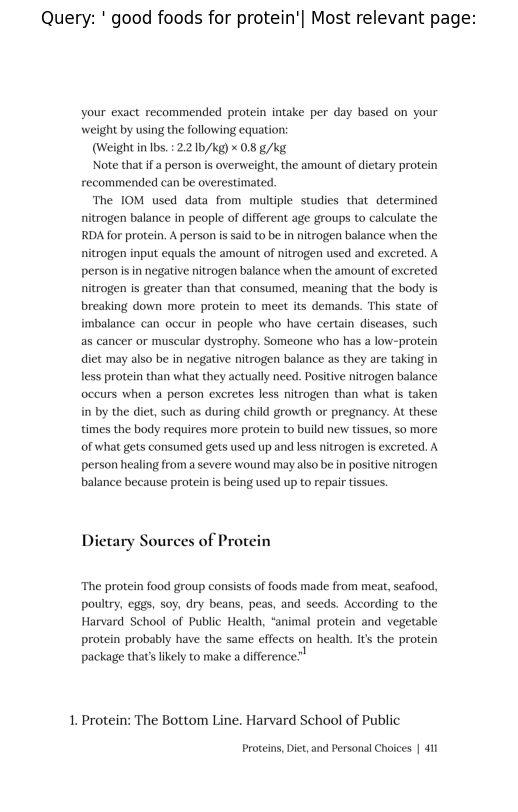

In [46]:
import fitz

pdf_path= "human-nutirition-text-pdf"
doc= fitz.open(pdf_path)
page= doc.load_page(411+41)

# Get the image of the page
img= page.get_pixmap(dpi=300)

#save image
img.save("output_filename.png")

doc.close()

# CONVERT THE PIXMAP TO A NUMPY ARRAY
img_array= np.frombuffer(img.samples_mv,dtype=np.uint8).reshape((img.h,img.w,img.n))

# Display image
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(img_array)
plt.title(f"Query: '{query}'| Most relevant page:")
plt.axis('off')
plt.show()

### **Similarity measures: dot product and cosine similarity**

Two of the common similarity measures : dot prod and cosine

Closer vectors: higher scores
further away vectors will have low scores.

Vectors have direction (which way is it going) and magnitude (how long is it?)


In [47]:
# import torch

# def dot_product(vector1,vector2):
#   return torch.dot(vector1,vector2)

# def cosine_similarity(vector1,vector2):
#   return torch.dot(vector1,vector2)/(torch.norm(vector1)*torch.norm(vector2))

# # example  vectors
# vector1= torch.tensor([1,2,3],dtype=torch.float32)
# vector2= torch.tensor([4,5,6],dtype=torch.float32)


In [48]:
# dot_product(vector1,vector2)

In [49]:
# cosine_similarity(vector1,vector2)

Since the embeddings that we get are already normalized : so thats why we've used dot product

***### Functionizing our semantic search pipeline(retrieval)***



In [50]:
def retrieve_relevant(query: str,
                      embeddings: torch.tensor,
                      model: SentenceTransformer=embedding_model,
                      n_resources_to_return: int=5,
                      print_time: bool=True):

  """
  Embeds a query with model and returns top k scores and indices from embeddings.
  """

  #Embed the query
  query_embedding= model.encode(query,convert_to_tensor=True).to(device)

  # Perform a dot product
  start_time=timer()
  dot_scores= util.dot_score(a=query_embedding,b=embeddings)[0]
  end_time=timer()

  if print_time:
    print(f"Time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds")

  scores,indices=torch.topk(input=dot_scores,k=n_resources_to_return)

  return scores,indices

def print_top_results_and_scores(query: str,
                                 embeddings: torch.tensor,
                                 pages_and_chunks: list[dict]=pages_and_chunks,
                                 n_resources_to_return=5):

  scores,indices=retrieve_relevant(query=query,
                                   embeddings=embeddings,
                                   n_resources_to_return=n_resources_to_return)

  for score, idx in zip(scores,indices):
        print(f" Score: {score:.4f}")
        print("Text:")
        print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
        print(f" Page number : {pages_and_chunks[idx]['page_number']}")
        print("\n")



In [51]:
retrieve_relevant(query="foods high in Vitamin B12 ",embeddings=embeddings)
print_top_results_and_scores(query="foods high in Vitamin B12 ",embeddings=embeddings)


Time taken to get scores on 1680 embeddings: 0.00009 seconds
Time taken to get scores on 1680 embeddings: 0.00008 seconds
 Score: 0.6799
Text:
Food Serving Vitamin B12 (mcg) Percent Daily Value Clams 3 oz. 84.1 1,402 Salmon 3 oz. 4.8 80 Tuna,
canned 3 oz. 2.5 42 Breakfast cereals, fortified 1 serving 1.5 25 Beef, top sirloin 3 oz. 1.4 23
Milk, lowfat 8 fl oz. 1.2 18 Yogurt, lowfat 8 oz. 1.1 18 Cheese, swiss 1 oz. 0.9 15 Egg 1 large 0.6
10 Dietary Fact Sheet: Vitamin B12. National Institute of Health, Office of Dietary Supplements.
https://ods.od.nih.gov/factsheets/ VitaminB12-HealthProfessional/. Updated February 11, 2016.
 Page number : 586


 Score: 0.6330
Text:
Dietary Reference Intakes The RDAs and ULs for different age groups for  Vitamin B12 are listed in
Table 9.27 “Dietary Reference Intakes for Vitamin B12“. Table 9.27  Dietary Reference Intakes for
Vitamin B12 Age Group RDA Males and Females mcg/day Infants (0–6 months) 0.4* Infants (7–12 months)
0.5* Children (1–3 years) 0.9 

###**Getting an LLM for local generation**

What is a generative LLM?

Goes from text input -> generate text_output.




In [52]:
#Get GPU available memory

import torch
gpu_memory_bytes=torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb= round(gpu_memory_bytes/(2**30))
print(f" Available gpu memory {gpu_memory_gb} GB")

 Available gpu memory 40 GB


Note: to use gemma-7b-it https://huggingface.co/google/gemma-7b-it or other gemma models--> Hugging face cli login https://huggingface.co/docs/huggingface_hub/guides/cli


In [53]:
! pip install -U "huggingface_hub"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.1/566.1 kB 39.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.35.3
    Uninstalling huggingface-hub-0.35.3:
      Successfully uninstalled huggingface-hub-0.35.3


In [54]:
!pip install -U "huggingface_hub[cli]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 6.2 MB/s eta 0:00:00


In [55]:
!hf auth login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineGrained).
The token `rag` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `rag`


In [56]:


!hf auth whoami





user:  INFISKI


In [57]:


# Note: the following is Gemma focused, however, there are more and more LLMs of the 2B and 7B size appearing for local use.
if gpu_memory_gb < 5.1:
    print(f"Your available GPU memory is {gpu_memory_gb}GB, you may not have enough memory to run a Gemma LLM locally without quantization.")
elif gpu_memory_gb < 8.1:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in 4-bit precision.")
    use_quantization_config = True
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb < 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.")
    use_quantization_config = False
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb > 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommend model: Gemma 7B in 4-bit or float16 precision.")
    use_quantization_config = False
    model_id = "google/gemma-7b-it"

print(f"use_quantization_config set to: {use_quantization_config}")
print(f"model_id set to: {model_id}")



GPU memory: 40 | Recommend model: Gemma 7B in 4-bit or float16 precision.
use_quantization_config set to: False
model_id set to: google/gemma-7b-it


In [58]:
!nvidia-smi

Sat Oct 25 09:26:43 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P0             52W /  400W |    1945MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

# Loading an LLM locally

We can load an LLM locally using hugging face Transformers.

To get a model running local we're going to need a few things:
1. A quantization config (optional) - a config on what precision to load the model in(eg. 8 bit , 4 bit, etc)

2. A model id- this will transformers which model/tokenizer to load

3. A tokenizer - this turns text into numbers ready for the LLM (note: a tokenizer is different from an embedding model)

4. An LLM model - this will be what we use to generate text based on an input

One of the best ways to load/make the LLM work faster is flash attention(Flash Attention 2). https://github.com/Dao-AILab/flash-attention


In [64]:
#  !pip install bitsandbytes accelerate
!  pip install -U transformers

In [67]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers.utils import is_flash_attn_2_available

#Create a quantization config
# !pip install bitsandbytes accelerate
from transformers import BitsAndBytesConfig
quantization_config= BitsAndBytesConfig(load_in_4bit=True,
                                        bnb_4bit_compute_dtype=torch.float16)

# Flash attention 2 =faster attention mechanism
#Flash Attention 2 requires GPU with a compute capability score of 8.0+ ,,,, Check this : https://developer.nvidia.com/cuda-gpus
if (is_flash_attn_2_available()) and (torch.cuda.get_device_capability()[0]>=8):
  print("Flash attention 2 available")
  attn_implementation="flash_attention_2"

else:
  attn_implementation="sdpa"

#Pick the model
model_id="google/gemma-7b-it"
model_id=model_id

tokenizer=AutoTokenizer.from_pretrained(model_id)

#Instantiate the model
llm_model=AutoModelForCausalLM.from_pretrained(pretrained_model_name_or_path=
                                               model_id,torch_dtype=torch.float16,
                                               quantization_config=quantization_config if use_quantization_config else None,
                                               low_cpu_mem_usage=False,
                                               attn_implementation=attn_implementation)
if not use_quantization_config:
  llm_model.to("cuda")


tokenizer_config.json:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/2.11G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

In [68]:
torch.cuda.get_device_capability(0)[0]

8

In [69]:
def get_model_num_params(model:torch.nn.Module):
  return sum([param.numel() for param in model.parameters()])

get_model_num_params(llm_model)

8537680896

In [72]:
def get_model_mem_size(model: torch.nn.Module):

  #get model param and buffer sizes
  mem_params= sum([param.nelement() * param.element_size() for param in model.parameters()])
  mem_buffers=sum([buf.nelement() * buf.element_size() for buf in model.buffers()])

  # Calculate model sizes
  model_mem_bytes= mem_params +mem_buffers
  model_mem_mb= model_mem_bytes /(1024 **2)
  model_mem_gb= model_mem_bytes /(1024**3)

  return {
      "model_mem_bytes": model_mem_bytes,
      "model_mem_mb": round(model_mem_mb,2),
      "model_mem_gb": round(model_mem_gb,2)
  }

print(get_model_mem_size(llm_model))

{'model_mem_bytes': 17075362304, 'model_mem_mb': 16284.33, 'model_mem_gb': 15.9}


This means to load Gemma-7b-it in float-16 we need a min of 16GB VRAM , however due to calculations that take place in the forward pass, we actually need closer to 19 GB.


# Generating text with our LLM

Because gemma-7b-it has been trained in an instruction tuned manner we should follow instruction templated for the best results



In [99]:
input_text = "What are the macronutrients, and what roles do they play in the human body?"
print(f"Input text:\n{input_text}")

# Create prompt template for instruction-tuned model
dialogue_template = [
    {"role": "user",
     "content": input_text}
]

# Apply the chat template
prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                       tokenize=False, # keep as raw text (not tokenized)
                                       add_generation_prompt=True)
print(f"\nPrompt (formatted):\n{prompt}")

Input text:
What are the macronutrients, and what roles do they play in the human body?

Prompt (formatted):
<bos><start_of_turn>user
What are the macronutrients, and what roles do they play in the human body?<end_of_turn>
<start_of_turn>model



In [100]:
tokenizer

GemmaTokenizerFast(name_or_path='google/gemma-7b-it', vocab_size=256000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='left', truncation_side='right', special_tokens={'bos_token': '<bos>', 'eos_token': '<eos>', 'unk_token': '<unk>', 'pad_token': '<pad>', 'additional_special_tokens': ['<start_of_turn>', '<end_of_turn>']}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<eos>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("<bos>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("<mask>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=False),
	5: AddedToken("<2mass>", rstrip=False, lstrip=False, single_wor

In [101]:
%%time

#Tokenize the input text

input_ids= tokenizer(prompt,return_tensors="pt").to("cuda")

#Generate outputs from Local LLM
#**input_ids equivalent to input_ids=tensor1, attention_mask=tensor2
outputs=llm_model.generate(**input_ids,max_new_tokens=256)

print(f"Model output (tokens): \n {outputs[0]}\n")

Model output (tokens): 
 tensor([     2,      2,    106,   1645,    108,   1841,    708,    573, 186809,
        184592, 235269,    578,   1212,  16065,    749,    984,   1554,    575,
           573,   3515,   2971, 235336,    107,    108,    106,   2516,    108,
         21404, 235269,   1517,    708,    573, 186809, 184592,    578,   1024,
         16065,    575,    573,   3515,   2971, 235292,    109,    688,  12298,
          1695, 184592,  66058,    109,    688, 235274, 235265, 110165,  56227,
         66058,    109, 235290,   5231,  11071,  66058,    108,    139, 235290,
         34428,   4134,    604,    573,   2971, 235265,    108,    139, 235290,
         13332,  41748,   5330,   9347,   5902, 235265,    108,    139, 235290,
         34428,  20149,    604,  51536,    578,  12792,   2962, 235265,    109,
           688, 235284, 235265,  96084,  66058,    109, 235290,   5231,  11071,
         66058,    108,    139, 235290,   8108,    578,  12158,  29703, 235265,
           108,

In [102]:
#Decode the output tokens to text
outputs_decoded= tokenizer.decode(outputs[0])
print(f'Model output (decoded): \n {outputs_decoded}\n')

Model output (decoded): 
 <bos><bos><start_of_turn>user
What are the macronutrients, and what roles do they play in the human body?<end_of_turn>
<start_of_turn>model
Sure, here are the macronutrients and their roles in the human body:

**Macronutrients:**

**1. Carbohydrates:**

- **Role:**
  - Provide energy for the body.
  - Help regulate blood sugar levels.
  - Provide fiber for digestion and gut health.

**2. Proteins:**

- **Role:**
  - Build and repair tissues.
  - Create enzymes and other chemicals.
  - Help regulate blood sugar levels.

**3. Fats:**

- **Role:**
  - Provide energy storage.
  - Help absorb vitamins and minerals.
  - Help regulate blood sugar levels.

**Other Functions:**

- Macronutrients play a role in regulating the body's metabolism, which is the process of breaking down food into energy.
- They also help to build and repair tissues, and to produce energy for the body.
- Macronutrients are essential for overall health and well-being.<eos>



In [103]:


# Nutrition-style questions generated with GPT4
gpt4_questions = [
    "What are the macronutrients, and what roles do they play in the human body?",
    "How do vitamins and minerals differ in their roles and importance for health?",
    "Describe the process of digestion and absorption of nutrients in the human body.",
    "What role does fibre play in digestion? Name five fibre containing foods.",
    "Explain the concept of energy balance and its importance in weight management."
]

# Manually created question list
manual_questions = [
    "How often should infants be breastfed?",
    "What are symptoms of pellagra?",
    "How does saliva help with digestion?",
    "What is the RDI for protein per day?",
    "water soluble vitamins"
]

query_list = gpt4_questions + manual_questions



In [104]:
import random
query = random.choice(query_list)

print(f"Query: {query}")

# Get just the scores and indices of top related results
scores, indices = retrieve_relevant(query=query,
                                              embeddings=embeddings)
scores, indices

Query: How do vitamins and minerals differ in their roles and importance for health?
Time taken to get scores on 1680 embeddings: 0.00009 seconds


(tensor([0.6322, 0.6220, 0.6187, 0.6178, 0.6128], device='cuda:0'),
 tensor([ 51,  47, 874,  41, 927], device='cuda:0'))

#Augmenting our prompt with context items

Retrieval done
Generation done
TIme to Augment!

The concept of augmenting a prompt with context items is also referred as prompt engineering.

Prompt engineering is an active field of research and many new styles and techniques are being found out

However, there are a fair few techniques that work quite well . Prompt Engineering Guide (https://www.promptingguide.ai/), https://github.com/brexhq/prompt-engineering and the paper Prompt Design and Engineering https://arxiv.org/abs/2401.14423

https://www.anthropic.com/news/prompt-engineering-for-business-performance

1. Give clear instructios.
2. Give a few examples of input/output (e.g. ggiven this input, I'd like this output)
3. GIve room to think (e.g. create a scratchpad/ "show your working space" / "let's think step by step...".




In [105]:
pages_and_chunks[419]

{'page_number': 277,
 'sentence_chunk': 'often. • Calm your “sweet tooth” by eating fruits, such as berries or an apple. • Replace sugary soft drinks with seltzer water, tea, or a small amount of 100 percent fruit juice added to water or soda water. The Food Industry: Functional Attributes of Carbohydrates and the Use of Sugar Substitutes In the food industry, both fast-releasing and slow-releasing carbohydrates are utilized to give foods a wide spectrum of functional attributes, including increased sweetness, viscosity, bulk, coating ability, solubility, consistency, texture, body, and browning capacity. The differences in chemical structure between the different carbohydrates confer their varied functional uses in foods. Starches, gums, and pectins are used as thickening agents in making jam, cakes, cookies, noodles, canned products, imitation cheeses, and a variety of other foods. Molecular gastronomists use slow- releasing carbohydrates, such as alginate, to give shape and texture 

In [118]:
def prompt_formatter(query: str,
                     context_items: list[dict])-> str:

      context= "- " + "\n- ".join([item['sentence_chunk'] for item in context_items])
      base_prompt = """Based on the following context items, please answer the query.
Give yourself room to think by extracting relevant passages from the context before answering the query.
Don't return the thinking, only return the answer.
Make sure your answers are as explanatory as possible.
Use the following examples as reference for the ideal answer style.
\nExample 1:
Query: What are the fat-soluble vitamins?
Answer: The fat-soluble vitamins include Vitamin A, Vitamin D, Vitamin E, and Vitamin K. These vitamins are absorbed along with fats in the diet and can be stored in the body's fatty tissue and liver for later use. Vitamin A is important for vision, immune function, and skin health. Vitamin D plays a critical role in calcium absorption and bone health. Vitamin E acts as an antioxidant, protecting cells from damage. Vitamin K is essential for blood clotting and bone metabolism.
\nExample 2:
Query: What are the causes of type 2 diabetes?
Answer: Type 2 diabetes is often associated with overnutrition, particularly the overconsumption of calories leading to obesity. Factors include a diet high in refined sugars and saturated fats, which can lead to insulin resistance, a condition where the body's cells do not respond effectively to insulin. Over time, the pancreas cannot produce enough insulin to manage blood sugar levels, resulting in type 2 diabetes. Additionally, excessive caloric intake without sufficient physical activity exacerbates the risk by promoting weight gain and fat accumulation, particularly around the abdomen, further contributing to insulin resistance.
\nExample 3:
Query: What is the importance of hydration for physical performance?
Answer: Hydration is crucial for physical performance because water plays key roles in maintaining blood volume, regulating body temperature, and ensuring the transport of nutrients and oxygen to cells. Adequate hydration is essential for optimal muscle function, endurance, and recovery. Dehydration can lead to decreased performance, fatigue, and increased risk of heat-related illnesses, such as heat stroke. Drinking sufficient water before, during, and after exercise helps ensure peak physical performance and recovery.
\nNow use the following context items to answer the user query:
{context}
\nRelevant passages: <extract relevant passages from the context here>
User query: {query}
Answer:"""

      base_prompt=base_prompt.format(context=context,query=query)

      # Create prompt template
      dialogue_template=[{}]
      dialogue_template = [
        {"role": "user",
        "content": base_prompt}
    ]

    # Apply the chat template
      prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                          tokenize=False,
                                          add_generation_prompt=True)

      return prompt
query=random.choice(query_list)
print(f" Query: {query}")

# Get just the scores and indices of top related results
scores, indices = retrieve_relevant(query=query,
                                              embeddings=embeddings)
# Create a list of context items
context_items=[pages_and_chunks[i] for i in indices]

#Format our prompt
prompt= prompt_formatter(query=query,context_items=context_items)

print(f"\nPrompt:\n {prompt}")
#here reranking model would definitely help


 Query: What are the macronutrients, and what roles do they play in the human body?
Time taken to get scores on 1680 embeddings: 0.00014 seconds

Prompt:
 <bos><start_of_turn>user
Based on the following context items, please answer the query.
Give yourself room to think by extracting relevant passages from the context before answering the query.
Don't return the thinking, only return the answer.
Make sure your answers are as explanatory as possible.
Use the following examples as reference for the ideal answer style.

Example 1:
Query: What are the fat-soluble vitamins?
Answer: The fat-soluble vitamins include Vitamin A, Vitamin D, Vitamin E, and Vitamin K. These vitamins are absorbed along with fats in the diet and can be stored in the body's fatty tissue and liver for later use. Vitamin A is important for vision, immune function, and skin health. Vitamin D plays a critical role in calcium absorption and bone health. Vitamin E acts as an antioxidant, protecting cells from damage. Vitam

Prompt example:
Based on the following contextsL
-sjkjds
-aajdksjad
-skajdakdjka
-sakjdksdja

Please answer the following query: .....
Answer:

In [119]:
%%time

input_ids = tokenizer(prompt,return_tensors="pt").to("cuda")

#Generate an output of tokens
outputs = llm_model.generate(**input_ids,temperature=.7,#lower the value more deterministic, higher the value more creative
                             do_sample=True, #whether or not to use sampling
                             max_new_tokens=256)

#Decode the output tokens to text
output_text = tokenizer.decode(outputs[0])
print(f"Query: {query}")
print(f"RAG answer: \m{output_text.replace(prompt,'')}")

<unknown>:11: SyntaxWarning: invalid escape sequence '\m'


Query: What are the macronutrients, and what roles do they play in the human body?
RAG answer: \m<bos>Sure, here is the answer to the user query:

The macronutrients are carbohydrates, lipids, and proteins. They are needed in large amounts and provide the body with energy and other essential functions.

**Carbohydrates:** Carbohydrates are molecules composed of carbon, hydrogen, and oxygen. They provide a readily available source of energy for the body and are stored in the liver and muscles.

**Lipids:** Lipids are molecules composed of carbon, hydrogen, and oxygen. They provide stored energy for the body, function as structural components of cells, and are involved in signaling molecules for proper cellular communication.

**Proteins:** Proteins are macromolecules composed of chains of subunits called amino acids. They are essential for tissue formation, cell reparation, and hormone and enzyme production. Proteins also provide structure to bones, muscles, and skin.<eos>
CPU times: us

# Functionaize our LLM answering feature


In [124]:
def ask(query: str,
        temperature=0.7,
        max_new_tokens=256,
        format_answer_text=True,
        return_answer_only= True
        ):
      """
      Takes a query, finds relevant resources/context and generates an answer to the query based on the relevant resources.
      """

      scores,indices = retrieve_relevant(query=query,embeddings=embeddings)

      #Creates a list of context_items
      context_items=[pages_and_chunks[i] for i in indices]

      #Add score to context item
      for i,item in enumerate(context_items):
        item["score"]= scores[i].cpu()

      #Format our prompt
      prompt= prompt_formatter(query=query,context_items=context_items)

      #GENERATION
      #Tokenize the prompt

      input_ids = tokenizer(prompt,return_tensors="pt").to("cuda")

      #Generate an output of tokens
      outputs = llm_model.generate(**input_ids,temperature=temperature,
                                  do_sample=True, #whether or not to use sampling
                                  max_new_tokens=max_new_tokens)

      #Decode the output tokens to text
      output_text = tokenizer.decode(outputs[0])
      if format_answer_text:
        output_text=output_text.replace(prompt,'').replace("<bos>","").replace("<eos>","")


      if return_answer_only:
        return output_text
      else:
        return output_text, context_items




In [126]:
import random
query = random.choice(query_list)

print(f"Query: {query}")
ask(query,temperature=0.2)


Query: Explain the concept of energy balance and its importance in weight management.
Time taken to get scores on 1680 embeddings: 0.00013 seconds


'Sure, here is the answer to the user query:\n\nEnergy balance is a fundamental concept in weight management. It refers to the equilibrium between the energy you take in through food and the energy you expend through physical activity and other metabolic processes. When your energy intake is equal to your energy expenditure, you are in energy balance, and your weight remains stable.\n\nAccording to the text, energy balance is achieved when the intake of energy is equal to energy expended. When you are in a positive energy balance, the excess nutrient energy will be stored or used to grow. When you are in a negative energy balance, your body will need to use its stores to provide energy.\n\nTherefore, weight can be thought of as a whole-body estimate of energy balance. When you are in energy balance, your body weight is maintained. When you are in negative energy balance, you lose weight. When you are in positive energy balance, you gain weight.'

In [129]:
import json, os

# get current notebook path (Colab saves as "Untitled*.ipynb" until renamed)
notebook_path = '/content/drive/MyDrive/RAG.ipynb'  # replace with your filename if saved

# clean metadata
with open(notebook_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

if "widgets" in data.get("metadata", {}):
    del data["metadata"]["widgets"]

with open(notebook_path, 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=1)

print("✅ Cleaned notebook metadata. Now use 'File → Save a copy in GitHub' again.")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/RAG.ipynb'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')